In [1]:
'''
Market Basket Analysis: Apriori Algorithm 
Dataset: Order1.csv 
The dataset has 38765 rows of the purchase orders of people from the grocery stores. 
These orders can be analysed, and association rules can be generated using Market Basket Analysis by algorithms 
like Apriori Algorithm. 
Follow following Steps: 
a. Data Pre-processing 
b. Generate the list of transactions from the dataset 
c. Train Apriori on the dataset 
d. Visualize the list of datasets 
'''

'\nMarket Basket Analysis: Apriori Algorithm \nDataset: Order1.csv \nThe dataset has 38765 rows of the purchase orders of people from the grocery stores. These orders can be analysed, and association rules can be generated using Market Basket Analysis by algorithms like Apriori Algorithm. \nFollow following Steps: \na. Data Pre-processing \nb. Generate the list of transactions from the dataset \nc. Train Apriori on the dataset \nd. Visualize the list of datasets \n'

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns

In [19]:
data = pd.read_csv(r'LP-1_Dataset\Apriori\Order1.csv')

data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [20]:
# data preprocessing
# group items by 'member_number' to create a list of transactions
transactions = data.groupby('Member_number')['itemDescription'].apply(list).tolist()

In [21]:
# generate the list of transactions
# use transaction encoder to transform the data into a one-hot encoded dataframe
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [24]:
# train the apriori model
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

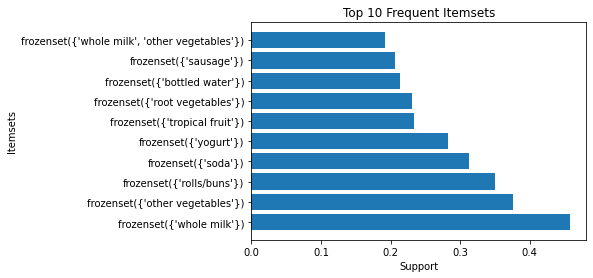

                                 antecedents                     consequents  \
0                                 (UHT-milk)                 (bottled water)   
1                                 (UHT-milk)              (other vegetables)   
2                                 (UHT-milk)                     (pip fruit)   
3                                 (UHT-milk)                    (rolls/buns)   
4                                 (UHT-milk)               (root vegetables)   
...                                      ...                             ...   
5839          (whole milk, soda, rolls/buns)      (other vegetables, yogurt)   
5840              (yogurt, soda, rolls/buns)  (whole milk, other vegetables)   
5841        (other vegetables, yogurt, soda)        (whole milk, rolls/buns)   
5842  (other vegetables, yogurt, rolls/buns)              (whole milk, soda)   
5843    (other vegetables, soda, rolls/buns)            (whole milk, yogurt)   

       support  confidence      lift  


In [32]:
# Step 4: Visualize the List of Datasets
# Visualize top 10 frequent itemsets by support
frequent_itemsets.sort_values(by="support", ascending=False, inplace=True)
plt.barh(frequent_itemsets["itemsets"].head(10).astype(str), frequent_itemsets["support"].head(10))
plt.xlabel("Support")
plt.ylabel("Itemsets")
plt.title("Top 10 Frequent Itemsets")
plt.show()

# Display the generated rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

([<matplotlib.axis.YTick at 0x1e0024dbf10>,
 [Text(0, 0, 'meat, domestic eggs -> whole milk'),
  Text(0, 1, 'fruit/vegetable juice, chocolate -> whole milk'),
  Text(0, 2, 'other vegetables, yogurt, rolls/buns, bottled water -> whole milk'),
  Text(0, 3, 'bottled water, yogurt, pip fruit -> whole milk'),
  Text(0, 4, 'yogurt, rolls/buns, brown bread -> whole milk'),
  Text(0, 5, 'other vegetables, bottled water, brown bread -> whole milk'),
  Text(0, 6, 'yogurt, rolls/buns, bottled beer -> whole milk'),
  Text(0, 7, 'yogurt, soda, curd -> whole milk'),
  Text(0, 8, 'other vegetables, yogurt, rolls/buns, shopping bags -> whole milk'),
  Text(0, 9, 'domestic eggs, rolls/buns, sausage -> whole milk')])

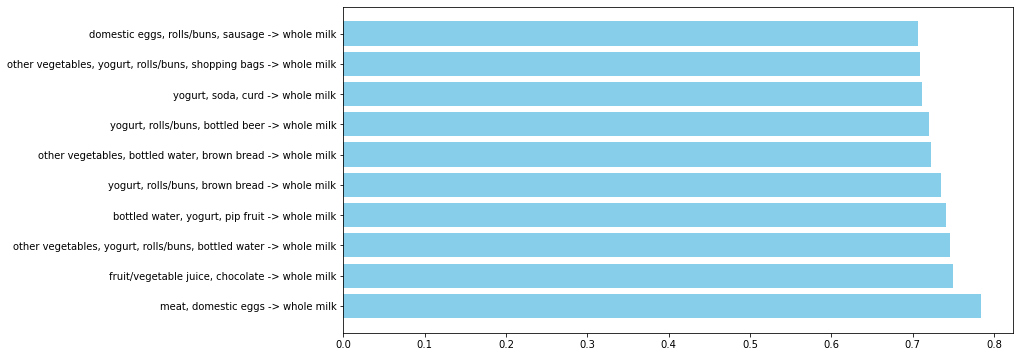

In [37]:
# sort rules by confidence in descending order to get the top itemsets
top_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_confidence_rules)), top_confidence_rules['confidence'], color='skyblue')
plt.yticks(range(len(top_confidence_rules)), [f"{', '.join(list(a))} -> {', '.join(list(c))}"
                                             for a, c in zip(top_confidence_rules['antecedents'],
                                                            top_confidence_rules['consequents'])])